In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import regionmask

regionmask.__version__

'0.9.0'

In [7]:
srex = regionmask.defined_regions.srex
srex

<regionmask.Regions>
Name:     SREX
Source:   Seneviratne et al., 2012 (https://www.ipcc.ch/site/assets/uploads/2...
overlap:  False

Regions:
 1 ALA       Alaska/N.W. Canada
 2 CGI     Canada/Greenl./Icel.
 3 WNA         W. North America
 4 CNA         C. North America
 5 ENA         E. North America
..  ..                      ...
22 EAS                  E. Asia
23 SAS                  S. Asia
24 SEA                S.E. Asia
25 NAU             N. Australia
26 SAU S. Australia/New Zealand

[26 regions]

In [8]:
srex.plot()

<GeoAxesSubplot:>

In [9]:
srex.plot();

## Plot options

The plot method has a large number of arguments to adjust the layout of the axes. For example, you can pass a custom projection, the labels can display the abbreviation insead of the region number, the ocean can be colored, etc.. This example also shows how to use matplotlib.patheffects to ensure the labels are easily readable without covering too much of the map (compare to the map above):

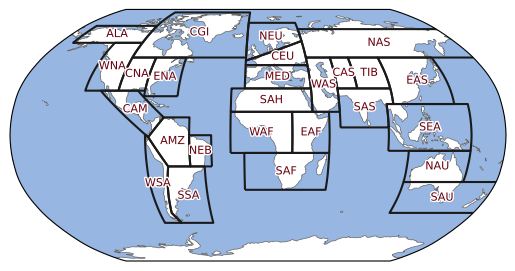

In [13]:
import cartopy.crs as ccrs
import matplotlib.patheffects as pe

text_kws = dict(
    bbox=dict(color="none"),
    path_effects=[pe.withStroke(linewidth=2, foreground="w")],
    color="#67000d",
    fontsize=8,
)

ax = srex.plot(
    projection=ccrs.Robinson(), label="abbrev", add_ocean=True, text_kws=text_kws
)

ax.set_global()
plt.show()

## Plot only a subset of regions

To plot a selection of regions subset them using indexing:

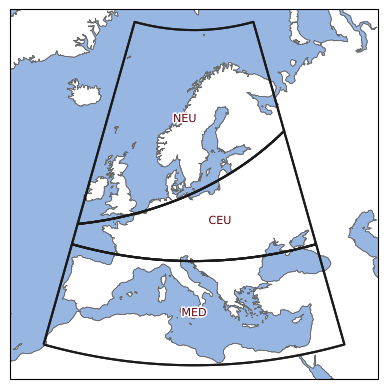

In [15]:
# regions can be selected by number, abbreviation or long name
regions = [11, "CEU", "S. Europe/Mediterranean"]

# choose a good projection for regional maps
proj = ccrs.LambertConformal(central_longitude=15)

ax = srex[regions].plot(
    add_ocean=True,
    resolution="50m",
    proj=proj,
    label="abbrev",
    text_kws=text_kws,
)

# fine tune the extent
ax.set_extent([-15, 45, 28, 76], crs=ccrs.PlateCarree())

plt.show()